In [8]:
import json

# The full path of the JSON file in the Downloads directory
file_path = 'C:\\Users\\Uday\\Downloads\\20230727_195816_hn_sharings.json'

# Loading JSON data
with open(file_path, 'r') as f:
    data = json.load(f)

In [9]:
for i in range(len(data)-1): 
    current_entry = data[i]
    next_entry = data[i+1]
    
    # Check if the next entry is a follow-up question
    if next_entry['role'] == 'system' and next_entry['content'].startswith('User:'):
        # Label as correct if the response and follow-up question are the same, else label as incorrect
        current_entry['label'] = 1 if current_entry['chatgpt_response'] == next_entry['content'][6:] else 0

In [10]:
# Save the labeled data
with open('C:\\Users\\Uday\\Downloads\\20230727_195816_hn_sharings.json', 'w') as f:
    json.dump(data, f, indent=2)


In [11]:
import json


input_file_path = 'C:\\Users\\Uday\\Downloads\\20230727_195816_hn_sharings.json'

# Specifying the full path to save the labeled data
output_file_path = 'C:\\Users\\Uday\\Downloads\\20230727_195816_hn_sharings_labeled.json'


with open(input_file_path, 'r') as f:
    data = json.load(f)

# Defineing a simple rule for labeling based on follow-up question
def label_response_with_followup(response, followup_question):
    # Implementing labeling rule here
    keywords_for_confirmation = ["yes", "correct", "affirmative"]
    
    # Check if any of the keywords for confirmation is present in the follow-up question
    if any(keyword in followup_question.lower() for keyword in keywords_for_confirmation):
        return 1  # Correct
    else:
        return 0  # Incorrect

# Add labels to the data based on a follow-up question
for i in range(len(data)-1):  # Iterate up to the second-to-last entry
    current_entry = data[i]
    next_entry = data[i+1]
    
    # Check if the next entry is a follow-up question
    if next_entry['role'] == 'system' and next_entry['content'].startswith('User:'):
        # Check if the 'label' key exists before accessing it
        if 'label' not in current_entry:
            current_entry['label'] = label_response_with_followup(current_entry['chatgpt_response'], next_entry['content'])

# Save the labeled data
with open(output_file_path, 'w') as f:
    json.dump(data, f, indent=2)



In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


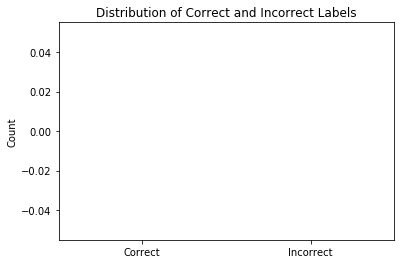

In [14]:
import json


labeled_file_path = 'C:\\Users\\Uday\\Downloads\\20230727_195816_hn_sharings_labeled.json'

# Loading the labeled data
with open(labeled_file_path, 'r') as f:
    labeled_data = json.load(f)

# Extract labels, handling cases where 'label' is missing or in an unexpected format
labels = []
for entry in labeled_data:
    if isinstance(entry, dict):  # Check if the entry is a dictionary
        try:
            label = entry.get('label', None)
            if label is not None:
                labels.append(int(label))  # Convert label to int if it's a string
        except (KeyError, ValueError):
            # Handle the case where 'label' is missing or not a valid integer
            labels.append(None)

# Count the occurrences of each label
label_counts = {'Correct': labels.count(1), 'Incorrect': labels.count(0)}

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(label_counts.keys(), label_counts.values(), color=['green', 'red'])
ax.set_ylabel('Count')
ax.set_title('Distribution of Correct and Incorrect Labels')

# Show the plot
plt.show()

